# 1. Slides Naive Bayes Example

### Step 1: Import Necessary Libraries and Load the Car Dataset

In [1]:
import pandas as pd

# Creating the DataFrame
car_data = {
    'id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'color': ['Red', 'Red', 'Red', 'Yellow', 'Yellow', 'Yellow', 'Yellow', 'Yellow', 'Red', 'Red'],
    'Type': ['Sports', 'Sports', 'Sports', 'Sports', 'Sports', 'SUV', 'SUV', 'SUV', 'SUV', 'Sports'],
    'Origin': ['Domestic', 'Domestic', 'Domestic', 'Domestic', 'Imported', 'Imported', 'Imported', 'Domestic', 'Imported', 'Imported'],
    'Was_stolen': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes']
}

df = pd.DataFrame(car_data)
# Set 'id' as the index
df.set_index('id', inplace=True)

In [2]:
df

,color,Type,Origin,Was_stolen
id,,,,
1,Red,Sports,Domestic,Yes
2,Red,Sports,Domestic,No
3,Red,Sports,Domestic,Yes
4,Yellow,Sports,Domestic,No
5,Yellow,Sports,Imported,Yes
6,Yellow,SUV,Imported,No
7,Yellow,SUV,Imported,Yes
8,Yellow,SUV,Domestic,No
9,Red,SUV,Imported,No


## 1.1 calculate the probability of a red car being stolen using Bayesian Theorem


$$ \large
P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}
$$
<div style="font-size: 18px;">
 Let $A$ be the event "a car is stolen" and $B$ be the event "the car is red".

- $P(A∣B)$ is the probability of a car being stolen given that it is red.

- $P(B∣A)$ is the probability of a car being red given that it is stolen.
 
- $P(A)$ is the overall probability of a car being stolen.

- $P(B)$ is the overall probability of a car being red.
</div>

In [3]:
# Calculating probabilities
 # Probability of a car being stolen
P_A = len(df[df['Was_stolen'] == 'Yes']) / len(df)               

# Probability of a car being red
P_B = len(df[df['color'] == 'Red']) / len(df) 

# Probability of a car being red given it is stolen
P_B_A = len(df[(df['color'] == 'Red') & 
               (df['Was_stolen'] == 'Yes')]) / len(df[df['Was_stolen'] == 'Yes'])

print(P_A, P_B, P_B_A)
# Applying Bayesian Theorem
P_A_B = (P_B_A * P_A) / P_B 

print(f"Probability of a red car being stolen: {P_A_B:.2f}")

0.5 0.5 0.6
Probability of a red car being stolen: 0.60


In [4]:
#use color to represent the B

P_Red = P_B
P_Red_A = P_B_A
P_A_Red = P_A_B

In [5]:
P_A_Red

0.6

## 1.2 Calculate the probability of a sport car being stolen from Bayesian Theorem

 
<div style="font-size: 18px;">
 Let A be the event "a car is stolen" and Sport be the event "the car is a sports car".

- **P(A∣Sport)** is the probability of a car being stolen given that it is a sports car.

- **P(Sport∣A)** is the probability of a car being sports given that it is stolen.
 
- **P(A)** is the overall probability of a car being stolen.

- **P(Sport)** is the overall probability of a car being a sports car.
</div>

In [6]:
df

,color,Type,Origin,Was_stolen
id,,,,
1,Red,Sports,Domestic,Yes
2,Red,Sports,Domestic,No
3,Red,Sports,Domestic,Yes
4,Yellow,Sports,Domestic,No
5,Yellow,Sports,Imported,Yes
6,Yellow,SUV,Imported,No
7,Yellow,SUV,Imported,Yes
8,Yellow,SUV,Domestic,No
9,Red,SUV,Imported,No


In [7]:
# P(A) - Probability of a car being stolen
P_A = len(df[df['Was_stolen'] == 'Yes']) / len(df)

# P(Sports) - Probability of a car being a sports car
P_Sports = len(df[df['Type'] == 'Sports']) / len(df)

# P(Sports|A) - Probability of a car being a sports car given that it is stolen
P_Sports_A = len(df[(df['Type'] == 'Sports') & 
                    (df['Was_stolen'] == 'Yes')]) / len(df[df['Was_stolen'] == 'Yes'])

# Applying Bayesian Theorem to find P(A|Sports)
P_A_Sports =  (P_Sports_A * P_A) / P_Sports
 
print('P_Sports_A: ',P_Sports_A,'P_A: ',P_A,'P_Sports: ',P_Sports )
print(f"Probability of a sports car being stolen: {P_A_Sports:.2f}")

P_Sports_A:  0.8 P_A:  0.5 P_Sports:  0.6
Probability of a sports car being stolen: 0.67


## 1.3 Calculate the probability of a Imported car being stolen from Bayesian Theorem

 
<div style="font-size: 18px;">
 Let A be the event "a car is stolen" and Imported be the event "the car is an Imported car".

- **P(A∣Imported)** is the probability of a car being stolen given that it is Imported.

- **P(Imported∣A)** is the probability of a car being Imported given that it is stolen.
 
- **P(A)** is the overall probability of a car being stolen.

- **P(Imported)** is the overall probability of a car being a Imported car.
</div>

In [8]:
df

,color,Type,Origin,Was_stolen
id,,,,
1,Red,Sports,Domestic,Yes
2,Red,Sports,Domestic,No
3,Red,Sports,Domestic,Yes
4,Yellow,Sports,Domestic,No
5,Yellow,Sports,Imported,Yes
6,Yellow,SUV,Imported,No
7,Yellow,SUV,Imported,Yes
8,Yellow,SUV,Domestic,No
9,Red,SUV,Imported,No


In [9]:
# P(Stolen) - Probability of a car being stolen
P_A = len(df[df['Was_stolen'] == 'Yes']) / len(df) 

# P(Imported) - Probability of a car being imported
P_Imported = len(df[df['Origin'] == 'Imported']) / len(df)

# P(Imported|Stolen) - Probability of a car being imported given that it is stolen
P_Imported_A = len(df[(df['Origin'] == 'Imported') 
                      & (df['Was_stolen'] == 'Yes')]) / len(df[df['Was_stolen'] == 'Yes']) 

# Applying Bayesian Theorem to find P(Stolen|Imported)
P_A_Imported =  (P_Imported_A * P_A) / P_Imported


print(f"Probability of an imported car being stolen: {P_A_Imported:.2f}")
3/ 5

Probability of an imported car being stolen: 0.60


0.6

In [10]:
df

,color,Type,Origin,Was_stolen
id,,,,
1,Red,Sports,Domestic,Yes
2,Red,Sports,Domestic,No
3,Red,Sports,Domestic,Yes
4,Yellow,Sports,Domestic,No
5,Yellow,Sports,Imported,Yes
6,Yellow,SUV,Imported,No
7,Yellow,SUV,Imported,Yes
8,Yellow,SUV,Domestic,No
9,Red,SUV,Imported,No


## 1.4 Calculate the probability of a Red Domestic SUV being stolen from Bayesian Theorem

<div style="font-size: 18px;">
Let's calculate the necessary probabilities:

-P(A) as the overall probability of a car being stolen.
 
-P(Red∣A) as the probability of a car being red given that it is stolen.
 
-P(Domestic∣A) as the probability of a car being domestic given that it is stolen.
 
-P(SUV∣A) as the probability of a car being an SUV given that it is stolen.
 
-P(A∣Red, Domestic, SUV) as the probability of a car being stolen given that it is a Red Domestic SUV.

</div>


In [11]:
# P(A) - Probability of a car being stolen
# P_A = len(df[df['Was_stolen'] == 'Yes']) / len(df)

# Assuming independence between features, calculate individual probabilities given the car is stolen
P_Red_Stolen = len(df[(df['color'] == 'Red') & 
                      (df['Was_stolen'] == 'Yes')]) / len(df[df['Was_stolen'] == 'Yes'])


P_Domestic_Stolen =  len(df[(df['Origin'] == 'Domestic') & 
                           (df['Was_stolen'] == 'Yes')]) / len(df[df['Was_stolen'] == 'Yes'])

P_SUV_Stolen =  len(df[(df['Type'] == 'SUV') & 
                      (df['Was_stolen'] == 'Yes')]) / len(df[df['Was_stolen'] == 'Yes'])

# Assuming independence, the joint probability P(Red, Domestic, SUV|Stolen) is the product of individual probabilities
# This is a simplification and not strictly Bayesian
P_Red_Domestic_SUV_A = P_Red_Stolen * P_Domestic_Stolen * P_SUV_Stolen 



# Estimate P(Stolen|Red, Domestic, SUV) using the simplification
P_A_Red_Domestic_SUV = P_A * P_Red_Domestic_SUV_A 

print(P_Red_Stolen , P_Domestic_Stolen , P_SUV_Stolen, P_A)

print(f"Estimated Probability of a Red Domestic SUV being stolen: {P_A_Red_Domestic_SUV:.3f}")


0.6 0.4 0.2 0.5
Estimated Probability of a Red Domestic SUV being stolen: 0.024


### A Red Domestic SUV not being stolen

In [12]:
# P(B) - Probability of a car being not stolen
P_B = len(df[df['Was_stolen'] == 'No']) / len(df) 

# Assuming independence between features, calculate individual probabilities given the car is stolen
P_Red_NoTStolen =  len(df[(df['color'] == 'Red') &
                         (df['Was_stolen'] == 'No')]) / len(df[df['Was_stolen'] == 'No'])

P_Domestic_NotStolen = len(df[(df['Origin'] == 'Domestic') &
                              (df['Was_stolen'] == 'No')]) / len(df[df['Was_stolen'] == 'No']) 

P_SUV_NotStolen = len(df[(df['Type'] == 'SUV') &
                         (df['Was_stolen'] == 'No')]) / len(df[df['Was_stolen'] == 'No'])


# Assuming independence, the joint probability P(Red, Domestic, SUV|Stolen) is the product of individual probabilities
# This is a simplification and not strictly Bayesian
P_Red_Domestic_SUV_B = P_Red_NoTStolen * P_Domestic_NotStolen * P_SUV_NotStolen



# Estimate P(Stolen|Red, Domestic, SUV) using the simplification
P_B_Red_Domestic_SUV = P_B_Red_Domestic_SUV = P_B * P_Red_Domestic_SUV_B

print(P_Red_NoTStolen , P_Domestic_NotStolen , P_SUV_NotStolen,P_B)

print(f"Estimated Probability of a Red Domestic SUV being NOT stolen: {P_B_Red_Domestic_SUV:.3f}")


0.4 0.6 0.6 0.5
Estimated Probability of a Red Domestic SUV being NOT stolen: 0.072


## 2. Calculate with Multinomial Naive Bayes

Given our dataset, we aim to calculate the probability of a Red Domestic SUV being stolen versus not being stolen using Bayes' Theorem. The theorem is represented as follows:

For the event of being stolen ($A$) given the car is a Red Domestic SUV ($RDS$):

$$
P(A | RDS) = \frac{P(RDS | A) \times P(A)}{P(RDS)}
$$

And for the event of not being stolen ($\neg A$):

$$
P(\neg A | RDS) = \frac{P(RDS | \neg A) \times P(\neg A)}{P(RDS)}
$$

Where:
- $P(A | RDS)$ is the probability of a Red Domestic SUV being stolen.
- $P(\neg A | RDS)$ is the probability of a Red Domestic SUV not being stolen.
- $P(RDS | A)$ is the probability of a car being a Red Domestic SUV given that it is stolen.
- $P(RDS | \neg A)$ is the probability of a car being a Red Domestic SUV given that it is not stolen.
- $P(A)$ is the overall probability of a car being stolen.
- $P(\neg A)$ is the overall probability of a car not being stolen.
- $P(RDS)$ is the probability of a car being a Red Domestic SUV.

Next, we will calculate these probabilities based on our dataset.


In [13]:
df

,color,Type,Origin,Was_stolen
id,,,,
1,Red,Sports,Domestic,Yes
2,Red,Sports,Domestic,No
3,Red,Sports,Domestic,Yes
4,Yellow,Sports,Domestic,No
5,Yellow,Sports,Imported,Yes
6,Yellow,SUV,Imported,No
7,Yellow,SUV,Imported,Yes
8,Yellow,SUV,Domestic,No
9,Red,SUV,Imported,No


In [14]:

P_Stolen = len(df[df['Was_stolen'] == 'Yes']) / len(df)
P_Not_Stolen = 1 - P_Stolen  # Assuming binary outcome
# Calculate P(Stolen) and P(Not Stolen)


In [15]:
# Probabilities of being Red, Domestic, and SUV
P_Red =  len(df[df['color'] == 'Red']) / len(df)
P_Domestic = len(df[df['Origin'] == 'Domestic']) / len(df)
P_SUV = len(df[df['Type'] == 'SUV']) / len(df)

# Conditional probabilities based on being stolen or not
# These are hypothetical and need assumptions since direct data is missing
P_Red_Stolen =  len(df[(df['color'] == 'Red') &
                      (df['Was_stolen'] == 'Yes')]) / len(df[df['Was_stolen'] == 'Yes'])

P_Domestic_Stolen =  len(df[(df['Origin'] == 'Domestic') &
                           (df['Was_stolen'] == 'Yes')]) / len(df[df['Was_stolen'] == 'Yes'])

P_SUV_Stolen = len(df[(df['Type'] == 'SUV') &
                      (df['Was_stolen'] == 'Yes')]) / len(df[df['Was_stolen'] == 'Yes'])



P_Red_Not_Stolen =  len(df[(df['color'] == 'Red') &
                          (df['Was_stolen'] == 'No')]) / len(df[df['Was_stolen'] == 'No'])

P_Domestic_Not_Stolen =  len(df[(df['Origin'] == 'Domestic') &
                               (df['Was_stolen'] == 'No')]) / len(df[df['Was_stolen'] == 'No'])


P_SUV_Not_Stolen = len(df[(df['Type'] == 'SUV') &
                          (df['Was_stolen'] == 'No')]) / len(df[df['Was_stolen'] == 'No'])


In [16]:
P_Red_Stolen,P_Domestic_Stolen,P_SUV_Stolen

(0.6, 0.4, 0.2)

In [17]:
P_Red_Not_Stolen,P_Domestic_Not_Stolen,P_SUV_Not_Stolen

(0.4, 0.6, 0.6)

In [18]:
# Assuming independence for simplification
P_Stolen_Given_Red_Domestic_SUV = (
    P_Stolen * P_Red_Stolen * P_Domestic_Stolen * P_SUV_Stolen
) / (
    (P_Stolen * P_Red_Stolen * P_Domestic_Stolen * P_SUV_Stolen) +
    (P_Not_Stolen * P_Red_Not_Stolen * P_Domestic_Not_Stolen * P_SUV_Not_Stolen)
)  # Your code

P_Not_Stolen_Given_Red_Domestic_SUV = (
    P_Not_Stolen * P_Red_Not_Stolen * P_Domestic_Not_Stolen * P_SUV_Not_Stolen
) / (
    (P_Stolen * P_Red_Stolen * P_Domestic_Stolen * P_SUV_Stolen) +
    (P_Not_Stolen * P_Red_Not_Stolen * P_Domestic_Not_Stolen * P_SUV_Not_Stolen)
)  # Your code

In [19]:
P_Stolen_Given_Red_Domestic_SUV,P_Not_Stolen_Given_Red_Domestic_SUV 

(0.25, 0.7499999999999999)

In [20]:
# Normalize probabilities so they sum to 1
total_prob = P_Stolen_Given_Red_Domestic_SUV + P_Not_Stolen_Given_Red_Domestic_SUV

P_Stolen_Given_Red_Domestic_SUV /= total_prob
P_Not_Stolen_Given_Red_Domestic_SUV /= total_prob

print(f"Estimated Probability of a Red Domestic SUV being stolen: {P_Stolen_Given_Red_Domestic_SUV:.2f}")
print(f"Estimated Probability of a Red Domestic SUV not being stolen: {P_Not_Stolen_Given_Red_Domestic_SUV:.2f}")


Estimated Probability of a Red Domestic SUV being stolen: 0.25
Estimated Probability of a Red Domestic SUV not being stolen: 0.75


# 3. Practice with Seed dataset

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Assuming you have downloaded the dataset and it's stored as 'seeds_dataset.txt'
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
df_seeds = pd.read_csv(url, sep='\t', header=None, on_bad_lines='skip')  # Adjust loading parameters as necessary

# Assign column names
df_seeds.columns = ['area', 'perimeter', 'compactness', 
                    'length_of_kernel', 'width_of_kernel', 
                    'asymmetry_coefficient', 'length_of_kernel_groove', 'class']

# Display the first few rows
df_seeds.head()


,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [22]:
set(df_seeds['class'].tolist())

{1, 2, 3}

## Correlation Matrix
<div style="font-size: 18px;">
A Correlation Matrix is a tool used in statistics and data analysis to measure the degree to which two variables are linearly related. It is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value of a correlation coefficient ranges between -1 and 1.

Understanding Correlation Coefficients:
- 1: A correlation of +1 indicates a perfect positive linear relationship between variables, where an increase in one variable exactly matches the increase in the other.
- 0: A correlation of 0 indicates no linear relationship between the variables.
- -1: A correlation of -1 indicates a perfect negative linear relationship between variables, where an increase in one variable matches the decrease in the other.
</div>

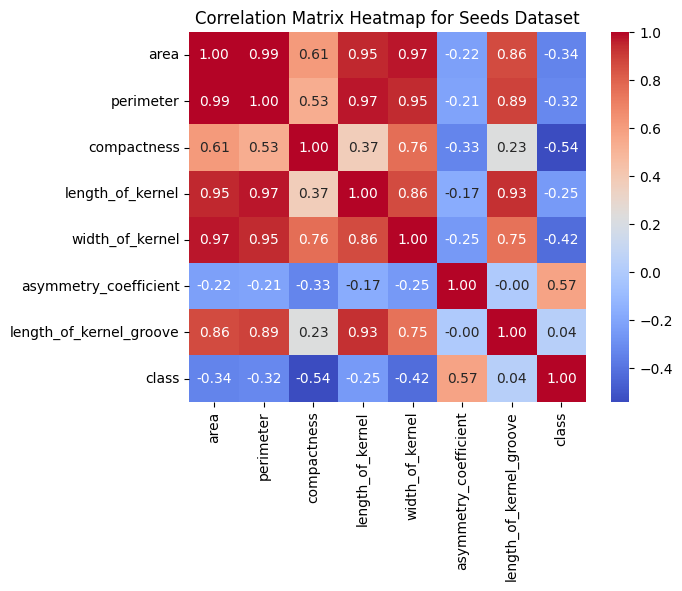

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = df_seeds.corr()

# Plot the correlation matrix as a heatmap
# plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap for Seeds Dataset")
# Save as PNG
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


##  Naive Bayes Model

### Questions: Given the features 'length_of_kernel','asymmetry_coefficient', 'length_of_kernel_groove', along with the class labels representing different species of Seed (Seed1, Seed2, and Seed3), can we predict the species of a Seed cluster using a Naive Bayes classifier?

Accuracy: 0.4166666666666667


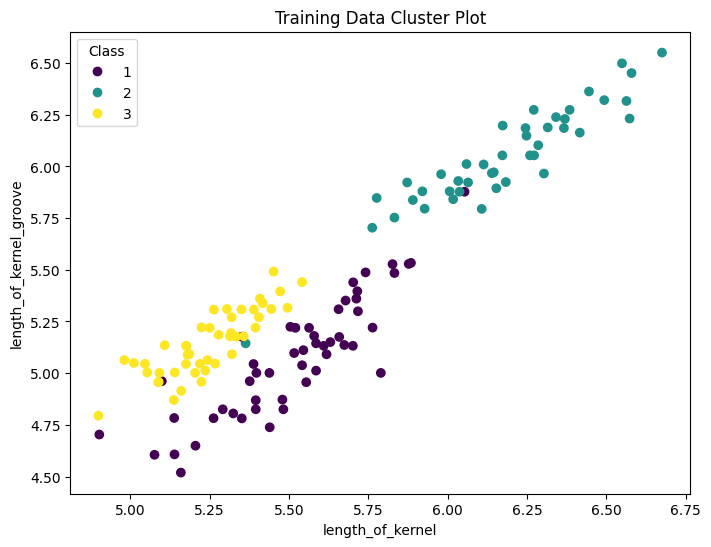

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Selecting only the desired attributes
df_attributes = df_seeds[['length_of_kernel',
                          'asymmetry_coefficient',
                          'length_of_kernel_groove']]  # asymmetry_coefficient and length_of_kernel_groove
df_labels = df_seeds['class']  # Seed class

# new_labels = np.where(df_labels > 2, 1, 2)

# Initialize the Multinomial Naive Bayes classifier
X_train, X_test, y_train, y_test = train_test_split(df_attributes, df_labels, test_size=0.3, random_state=42)
clf = MultinomialNB()

# Train the classifier
clf.fit(X_train, y_train)

# Predict the class labels for the testing data
y_pred_test = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

# Plot the clusters for training data
plt.figure(figsize=(8, 6))  # Your code
scatter = plt.scatter(
    X_train['length_of_kernel'],
    X_train['length_of_kernel_groove'],
    c=y_train,
    cmap='viridis'
)
plt.xlabel("length_of_kernel")
plt.ylabel("length_of_kernel_groove")
plt.title("Training Data Cluster Plot")
plt.legend(*scatter.legend_elements(), title="Class")

# 🔹 Save cluster plot as PNG
plt.savefig("training_clusters.png", dpi=300, bbox_inches='tight')

plt.show()

In [25]:
# Calculate the confusion matrix
# Your code
cm = confusion_matrix(y_test, y_pred_test)   # Your code
print(cm)

[[11  0  4]
 [15  0 10]
 [ 6  0 14]]


Accuracy: 0.4166666666666667


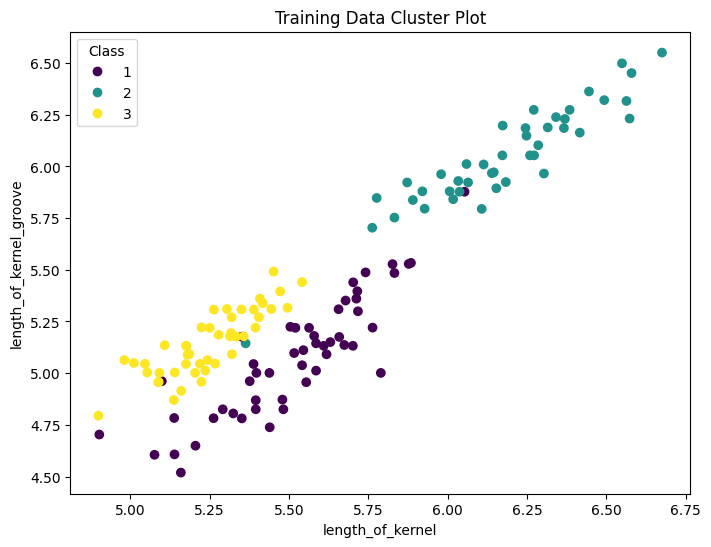

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
# Selecting only the desired attributes
df_attributes = df_seeds[['length_of_kernel',
                          'asymmetry_coefficient', 
                          'length_of_kernel_groove']]  # asymmetry_coefficient and length_of_kernel_groove
df_labels = df_seeds['class']  # Seed class

# new_labels = np.where(df_labels > 2, 1, 2)
# Initialize the Multinomial Naive Bayes classifier

# Your code


X_train, X_test, y_train, y_test = train_test_split(df_attributes, df_labels, test_size=0.3, random_state=42)
clf = MultinomialNB() 

# Train the classifier
clf.fit(X_train, y_train)

# Predict the class labels for the testing data
y_pred_test = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

# Plot the clusters for training data
plt.figure(figsize=(8, 6))              # Your code
scatter = plt.scatter(
    X_train['length_of_kernel'],
    X_train['length_of_kernel_groove'],
    c=y_train,
    cmap='viridis'
)
plt.xlabel("length_of_kernel")
plt.ylabel("length_of_kernel_groove")
plt.title("Training Data Cluster Plot")
plt.legend(*scatter.legend_elements(), title="Class")
plt.savefig("confusion_matrix_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()




### Explanation:

### Please provide your explanation for your plot results.

The training plot visually confirms that Class 2 is distinct, while Classes 1 and 3 overlap, making them difficult for Naive Bayes to separate.

The confusion matrix supports this: Class 2 was never predicted, and many Class 1/3 samples were confused with each other.

The low accuracy (≈ 41%) is expected because Multinomial Naive Bayes is not suited for continuous numeric features like those in the Seeds dataset.

### Use all features for Bayes classifier

In [27]:

# Split the dataset into features (X) and labels (y)
X = df_attributes  
y = df_labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Initialize the Multinomial Naive Bayes classifier
clf = MultinomialNB()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.4166666666666667


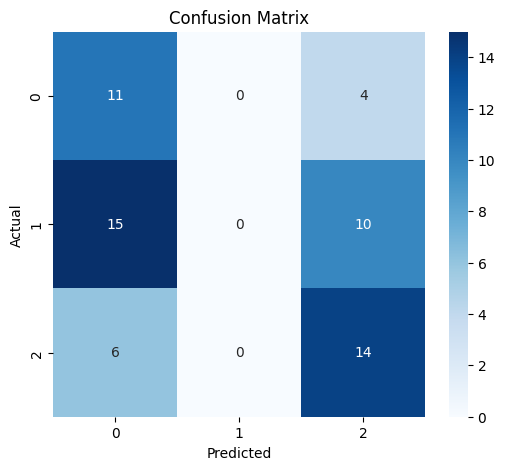

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)   

# Plot the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

#Save as PNG
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')

plt.show()

# The Naive Bayes Family of Algorithms

The **Naive Bayes family** consists of probabilistic classifiers based on **Bayes’ Theorem**, assuming that features are **independent** of each other given the class label.

$$
P(C|X) = \frac{P(C) \cdot P(X|C)}{P(X)}
$$

Each variant differs in how it models **feature distributions** — continuous, binary, categorical, or count-based.

---

## 1. Gaussian Naive Bayes (GaussianNB)

- **Used for:** Continuous numeric features  
- **Assumption:** Each feature follows a **Gaussian (normal) distribution**  
- **Common uses:** Medical measurements, Iris dataset, exam scores  

**Formula:**

$$
P(x_i | C_k) = \frac{1}{\sqrt{2\pi\sigma_{k,i}^2}} 
\exp\left(-\frac{(x_i - \mu_{k,i})^2}{2\sigma_{k,i}^2}\right)
$$

Implemented as `GaussianNB()` in scikit-learn

## 2. Multinomial Naive Bayes (MultinomialNB)

- **Used for:** Discrete counts or frequency features  
- **Assumption:** Features represent **counts or frequencies** (non-negative integers)  
- **Common uses:** Text classification, word frequency analysis  

Implemented as `MultinomialNB()`

##  3. Bernoulli Naive Bayes (BernoulliNB)

- **Used for:** Binary (0/1) features  
- **Assumption:** Each feature represents presence or absence (True/False)  
- **Common uses:** Document classification with binary term presence  

 Implemented as `BernoulliNB()`


#  Practice Lab: Multinomial Naive Bayes on the Iris Dataset
###  Objective

In this lab, you will:

Load and explore the Iris dataset.

Train a Multinomial Naive Bayes classifier.

Evaluate the model using accuracy and confusion matrix.

Visualize predictions with a heatmap

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

### Step 2 — Load and Explore the Dataset

Requirement:

Load the Iris dataset using load_iris()

Convert it to a pandas DataFrame.

Display the first 5 rows.

In [30]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target   # Your code

# Convert to pandas DataFrame
df_iris = pd.DataFrame(X, columns=iris.feature_names)
df_iris['class'] = y   # Add class labels

# Display the first 5 rows
df_iris.head()   



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Step 3 — Preprocessing (Scaling the Features)

Requirement:

Extract X (features) and y (target).

Apply MinMaxScaler to ensure all feature values are positive and between 0 and 1.

Split into 75% training and 25% testing data.

In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Extract X (features) and y (target)
X = df_iris.drop('class', axis=1)     
y = df_iris['class']                  

# Apply MinMaxScaler to scale features between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)    

# Split into 75% training and 25% testing data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)  


### Step 4 — Train the Multinomial Naive Bayes Model

Requirement:

Initialize MultinomialNB().

Fit the model using the training data.

Print the learned class log priors.

In [32]:
# Initialize MultinomialNB()
clf = MultinomialNB()     

# Fit the model using the training data
clf.fit(X_train, y_train)  

# Print the learned class log priors
print("Class Log Priors:", clf.class_log_prior_)   


Class Log Priors: [-1.16315081 -1.05493723 -1.08091271]


### Step 5 — Make Predictions and Evaluate

Requirement:

Predict on the test data.

Print accuracy, classification report, and confusion matrix (as raw numbers).

In [33]:
# Predict on the test data
y_pred = clf.predict(X_test)    

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))   

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))   

# Print confusion matrix (raw numbers)
cm = confusion_matrix(y_test, y_pred)   
print("\nConfusion Matrix:\n", cm)


Accuracy: 0.6842105263157895

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.48      1.00      0.65        11
           2       0.00      0.00      0.00        12

    accuracy                           0.68        38
   macro avg       0.49      0.67      0.55        38
weighted avg       0.53      0.68      0.58        38


Confusion Matrix:
 [[15  0  0]
 [ 0 11  0]
 [ 0 12  0]]


C:\Users\MARI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\MARI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\MARI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

### Step 6 — Visualize the Confusion Matrix

Requirement:

Use Seaborn’s heatmap() to display the confusion matrix.

Label axes clearly.

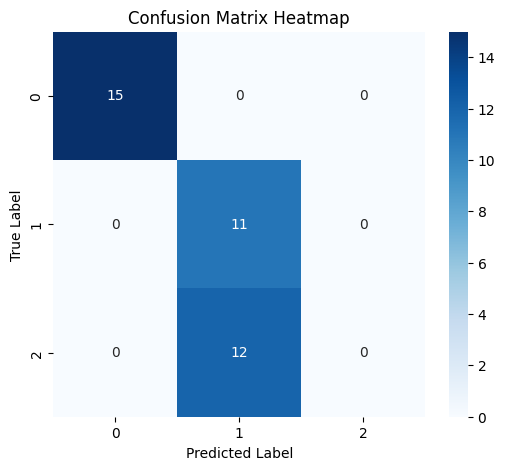

In [34]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Save the heatmap as a PNG file
plt.savefig("confusion_matrix_heatmap.png", dpi=300, bbox_inches='tight')

plt.show()